In [284]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

df = pd.read_csv("car_price_prediction.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [285]:
df.drop(columns=["Car ID"], axis=1, inplace=True)

In [286]:
df["Brand"].unique()

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

In [287]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop(columns=["Brand"], inplace=True, axis=1)

In [288]:
df.head()

,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota
0,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X,False,False,False,False,False,True,False
1,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series,False,True,False,False,False,False,False
2,2013,4.5,Electric,Manual,181601,New,44402.61,A4,True,False,False,False,False,False,False
3,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,False,False,False,False,False,True,False
4,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,False,False,True,False,False,False,False


In [289]:
df["Fuel Type"].unique()

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [290]:
df = pd.concat([df, pd.get_dummies(df["Fuel Type"])], axis=1)
df.drop(columns=["Fuel Type"], inplace=True, axis=1)

In [291]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [292]:
df["Transmission"] = df["Transmission"].map({"Manual": 0,"Automatic": 1})

In [293]:
df.head()

,Year,Engine Size,Transmission,Mileage,Condition,Price,Model,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota,Diesel,Electric,Hybrid,Petrol
0,2016,2.3,0,114832,New,26613.92,Model X,False,False,False,False,False,True,False,False,False,False,True
1,2018,4.4,0,143190,Used,14679.61,5 Series,False,True,False,False,False,False,False,False,True,False,False
2,2013,4.5,0,181601,New,44402.61,A4,True,False,False,False,False,False,False,False,True,False,False
3,2011,4.1,1,68682,New,86374.33,Model Y,False,False,False,False,False,True,False,True,False,False,False
4,2009,2.6,0,223009,Like New,73577.10,Mustang,False,False,True,False,False,False,False,True,False,False,False


In [294]:
df["Condition"].unique()

array(['New', 'Used', 'Like New'], dtype=object)

In [295]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[["Used", "Like New", "New"]])
df["Condition"] = enc.fit_transform(df[["Condition"]])

In [296]:
df.head()

,Year,Engine Size,Transmission,Mileage,Condition,Price,Model,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota,Diesel,Electric,Hybrid,Petrol
0,2016,2.3,0,114832,2.0,26613.92,Model X,False,False,False,False,False,True,False,False,False,False,True
1,2018,4.4,0,143190,0.0,14679.61,5 Series,False,True,False,False,False,False,False,False,True,False,False
2,2013,4.5,0,181601,2.0,44402.61,A4,True,False,False,False,False,False,False,False,True,False,False
3,2011,4.1,1,68682,2.0,86374.33,Model Y,False,False,False,False,False,True,False,True,False,False,False
4,2009,2.6,0,223009,1.0,73577.10,Mustang,False,False,True,False,False,False,False,True,False,False,False


In [297]:
df.drop(columns=["Model"], axis=1, inplace=True)

In [298]:
df.isnull().sum()

Year            0
Engine Size     0
Transmission    0
Mileage         0
Condition       0
Price           0
Audi            0
BMW             0
Ford            0
Honda           0
Mercedes        0
Tesla           0
Toyota          0
Diesel          0
Electric        0
Hybrid          0
Petrol          0
dtype: int64

In [299]:
df.head()

,Year,Engine Size,Transmission,Mileage,Condition,Price,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota,Diesel,Electric,Hybrid,Petrol
0,2016,2.3,0,114832,2.0,26613.92,False,False,False,False,False,True,False,False,False,False,True
1,2018,4.4,0,143190,0.0,14679.61,False,True,False,False,False,False,False,False,True,False,False
2,2013,4.5,0,181601,2.0,44402.61,True,False,False,False,False,False,False,False,True,False,False
3,2011,4.1,1,68682,2.0,86374.33,False,False,False,False,False,True,False,True,False,False,False
4,2009,2.6,0,223009,1.0,73577.10,False,False,True,False,False,False,False,True,False,False,False


In [300]:
def prepare_data(df: pd.DataFrame):
    x,y = df.drop(columns=["Price"]), df["Price"]
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    y_array = y.values
    x_train, x_val, y_train, y_val = train_test_split(x_scaled,y_array,test_size=0.2,random_state=42)
    return x_train, x_val, y_train, y_val, scaler

In [301]:
x_train, x_val, y_train, y_val, scaler = prepare_data(df)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2000, 16), (500, 16), (2000,), (500,))

In [302]:
class CarDataset(Dataset):
    def __init__(self,x,y):
        super().__init__()
        
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32).reshape(-1,1)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [303]:
train_ds = CarDataset(x_train, x_val)
val_ds = CarDataset(x_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=256, shuffle=False)

len(train_ds), len(val_ds)

(2000, 500)

In [304]:
def build_model(input_dim: int) -> nn.Module:
    model = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
    )
    return model

In [305]:
input_dim = x_train.shape[1]
model = build_model(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

Sequential(
  (0): Linear(in_features=16, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [306]:
def train_one_epoch(model: nn.Module,
                    train_loader: DataLoader,
                    criterion,
                    optimizer) -> float:
    model.train()
    losses = []
    batches = 0
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        batches += 1
    return sum(losses) / batches

In [307]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model: nn.Module, val_loader: DataLoader) -> float:
    model.eval()
    all_true_labels = []
    all_predicted_labels = []
    with torch.no_grad():
        for inputs,labels in val_loader:
            outputs = model(inputs)

            predictions = (outputs >= 0.5).float()

            all_predicted_labels.extend(predictions.numpy().flatten())
            all_true_labels.extend(labels.numpy().flatten())
    mae = mean_absolute_error(all_true_labels, all_predicted_labels)
    rmse = np.sqrt(mean_squared_error(all_true_labels, all_predicted_labels))
    r2 = r2_score(all_true_labels, all_predicted_labels)
    
    return float(mae), float(rmse), float(r2)

In [308]:
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer)
    val_acc = evaluate(model, val_loader)
    train_losses.append(train_loss)
    val_accuracies.append(val_acc)
    mae, rmse, r2 = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}/{epochs} | Train loss: {train_loss:.4f} | Val MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")


Epoch 1/10 | Train loss: 0.9924 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 2/10 | Train loss: 0.9818 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 3/10 | Train loss: 0.9752 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 4/10 | Train loss: 0.9831 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 5/10 | Train loss: 0.9772 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 6/10 | Train loss: 0.9735 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 7/10 | Train loss: 0.9558 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 8/10 | Train loss: 0.9619 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 9/10 | Train loss: 0.9418 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562
Epoch 10/10 | Train loss: 0.9622 | Val MAE: 53343.36 | RMSE: 60025.55 | R²: -3.7562


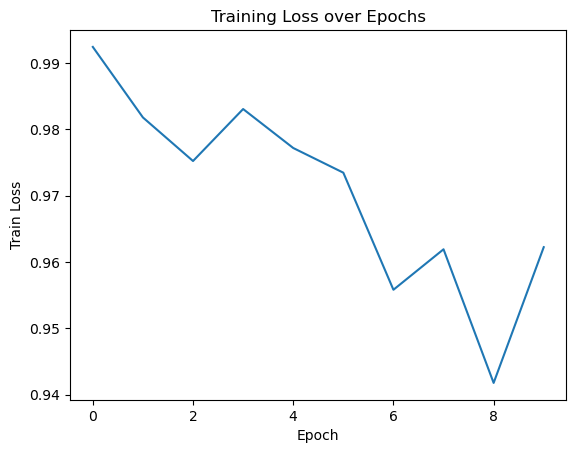

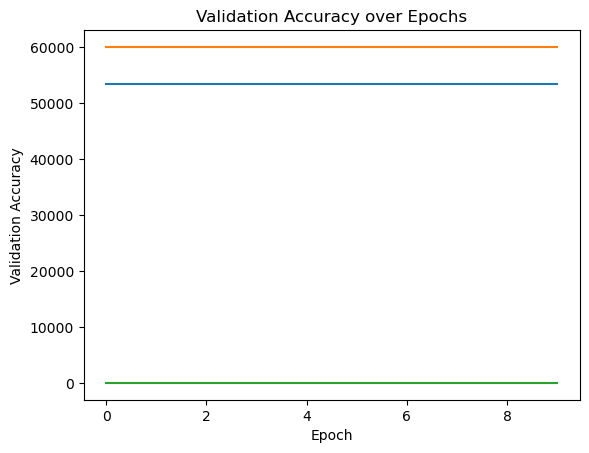

In [309]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss over Epochs")
plt.show()

plt.plot(val_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.show()